In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import cv2
import numpy as np
import os
import sys
from matplotlib import pyplot as plt
import nxpd
from skimage import filters

nxpd.nxpdParams['show'] = 'ipynb'

In [3]:
CODE_DIR = os.path.abspath('..')
sys.path.append(os.path.join(CODE_DIR, 'VisionCG'))
sys.path.append(os.path.join(CODE_DIR, 'EPypes'))

In [4]:
from visioncg import regions, lines, edges, io, improc, viz, corners, nputil, circles

## Opening an image

Image dimensions: (258, 604, 3)


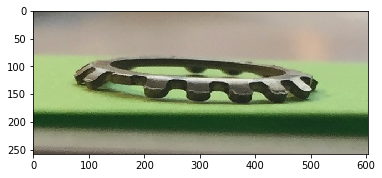

In [5]:
im_swgreen = io.open_image('sw_side_green.jpg', color_transform=cv2.COLOR_BGR2RGB)
print('Image dimensions:', im_swgreen.shape)

_ = plt.imshow(im_swgreen)

## Image channels

Text(0.5, 1.0, 'Blue')

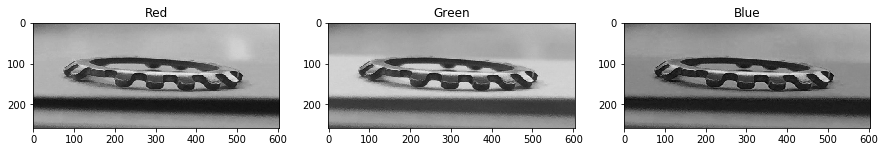

In [6]:
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.imshow(im_swgreen[:, :, 0], cmap='gray', vmin=0, vmax=255)
plt.title('Red')

plt.subplot(1, 3, 2)
plt.imshow(im_swgreen[:, :, 1], cmap='gray', vmin=0, vmax=255)
plt.title('Green')

plt.subplot(1, 3, 3)
plt.imshow(im_swgreen[:, :, 2], cmap='gray', vmin=0, vmax=255)
plt.title('Blue')

## Thresholding

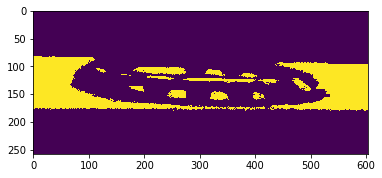

In [7]:
green_t = im_swgreen[:, :, 1] > 200

_ = plt.imshow(green_t)

## Connected components

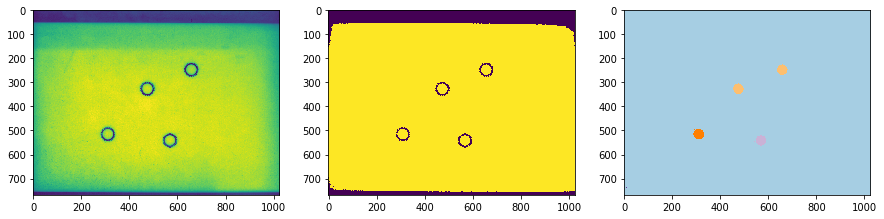

In [8]:
im_swfeeder = io.open_image('sw_on_feeder.png', read_flag=cv2.IMREAD_GRAYSCALE)
swfeeder_t = regions.threshold_binary(im_swfeeder, 150)

swfeeder_labels, swfeeder_ccomp_df = regions.find_ccomp(swfeeder_t)

plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
_ = plt.imshow(im_swfeeder)

plt.subplot(1, 3, 2)
_ = plt.imshow(swfeeder_t)

plt.subplot(1, 3, 3)
_ = plt.imshow(swfeeder_labels, cmap='Paired')

In [9]:
swfeeder_ccomp_df

,left,top,width,height,area,x,y
0,0,0,1024,768,81314,507.474654,196.006407
1,0,54,1024,702,699139,512.070369,405.095013
2,830,58,1,1,1,830.000000,58.000000
3,11,67,1,1,1,11.000000,67.000000
4,12,69,1,1,1,12.000000,69.000000
5,992,70,1,1,1,992.000000,70.000000
6,994,70,1,1,1,994.000000,70.000000
7,1001,74,1,1,1,1001.000000,74.000000
8,1003,75,1,1,1,1003.000000,75.000000
9,1005,75,1,1,1,1005.000000,75.000000


## Blobs

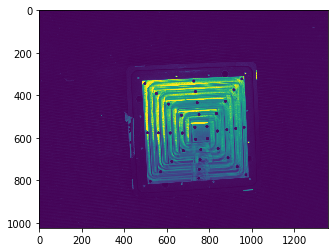

In [10]:
im_pyramid = io.open_image('pyramid.bmp', read_flag=cv2.IMREAD_GRAYSCALE)

_ = plt.imshow(im_pyramid)

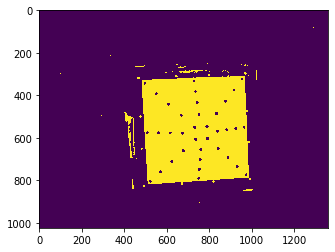

In [11]:
pyramid_t = regions.threshold_binary(im_pyramid, 20)

_ = plt.imshow(pyramid_t)

In [12]:
blob_keypoints = circles.detect_circular_blobs(pyramid_t)

xyr = [(kp.pt[0], kp.pt[1], kp.size / 2.) for kp in blob_keypoints]

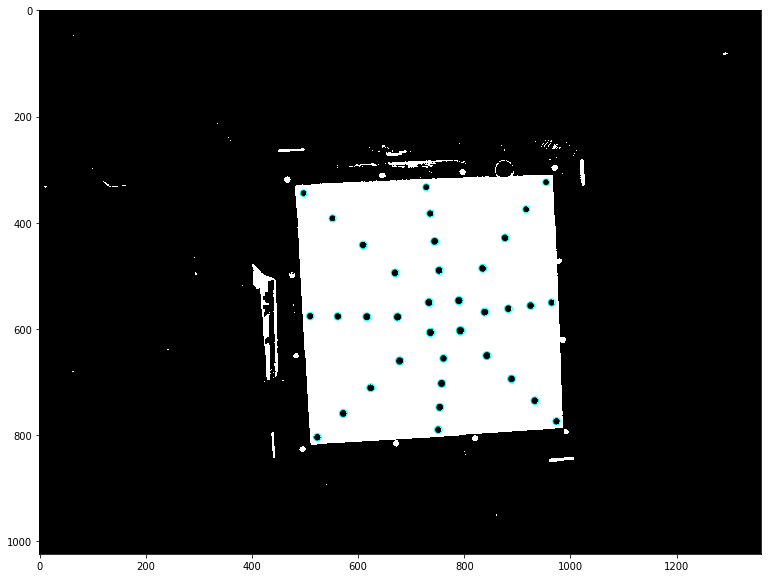

In [13]:
plt.figure(figsize=(15, 10))
_ = plt.imshow(pyramid_t, cmap='gray')

viz.plot_circles(xyr, color='cyan')

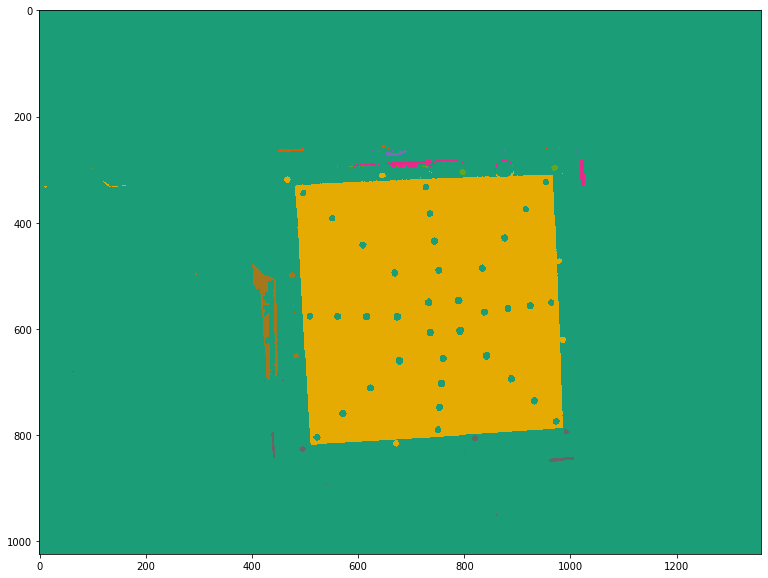

In [14]:
pyramid_labels, pyramid_ccomp_df = regions.find_ccomp(pyramid_t)

plt.figure(figsize=(15, 10))
plt.imshow(pyramid_labels, cmap='Dark2')

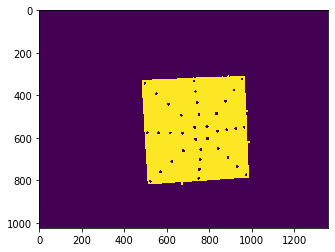

In [15]:
max_area_index = pyramid_ccomp_df.iloc[1:].area.idxmax()

pyramid_target_component = np.array(pyramid_labels == max_area_index, dtype=np.uint8) * 255

_ = plt.imshow(pyramid_target_component)

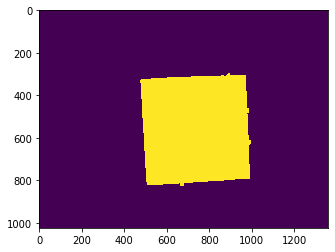

In [16]:
pyramid_dilated = improc.dilate(pyramid_target_component, 11)

_ = plt.imshow(pyramid_dilated)

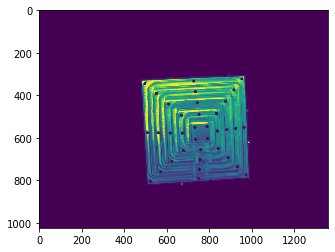

In [17]:
pyramid_masked = np.bitwise_and(im_pyramid, pyramid_dilated)

_ = plt.imshow(pyramid_masked)

## Smoothing, edges, lines

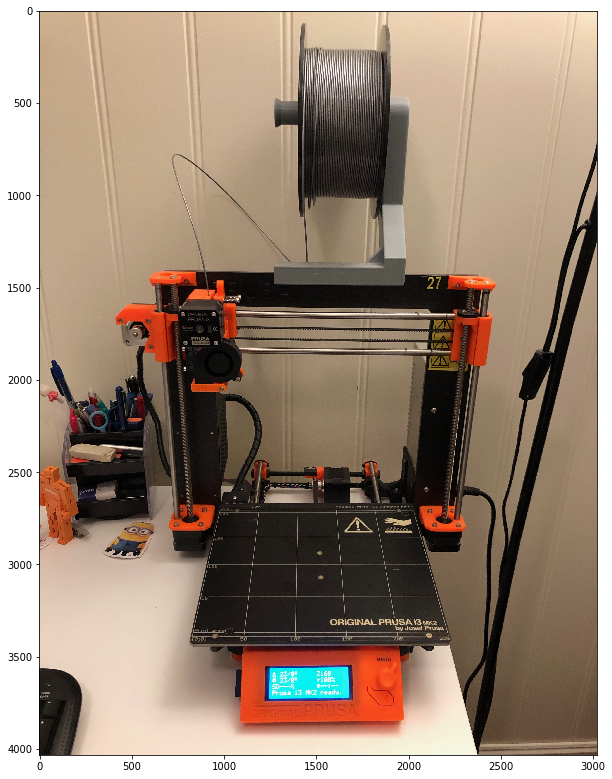

In [18]:
im_prusa = io.open_image('prusa.jpg', color_transform=cv2.COLOR_BGR2RGB)
im_prusa_gray = improc.grayscale(im_prusa)
im_prusa_gray_smoothed = improc.gaussian_blur(im_prusa_gray, 5)

plt.figure(figsize=(10, 15))
_ = plt.imshow(im_prusa)

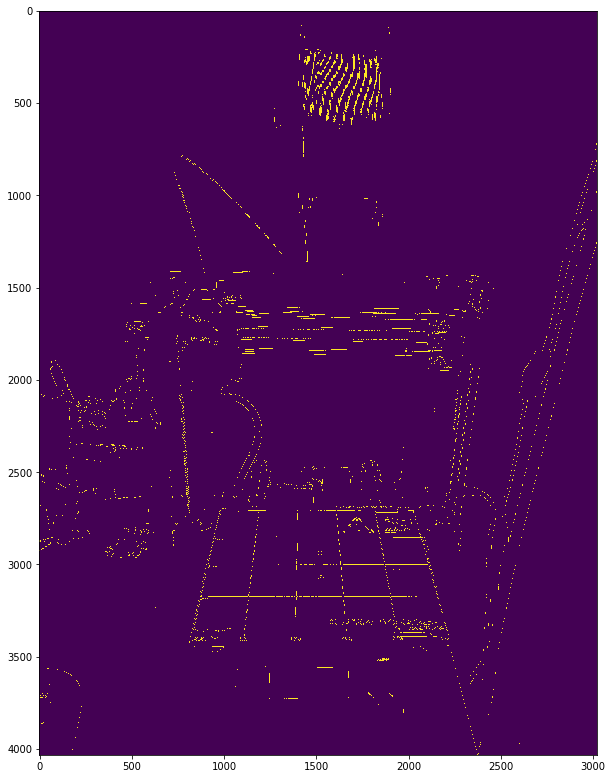

In [19]:
prusa_edges = cv2.Canny(
    im_prusa_gray_smoothed,
    150,
    200,
)


plt.figure(figsize=(10, 15))
_ = plt.imshow(prusa_edges)

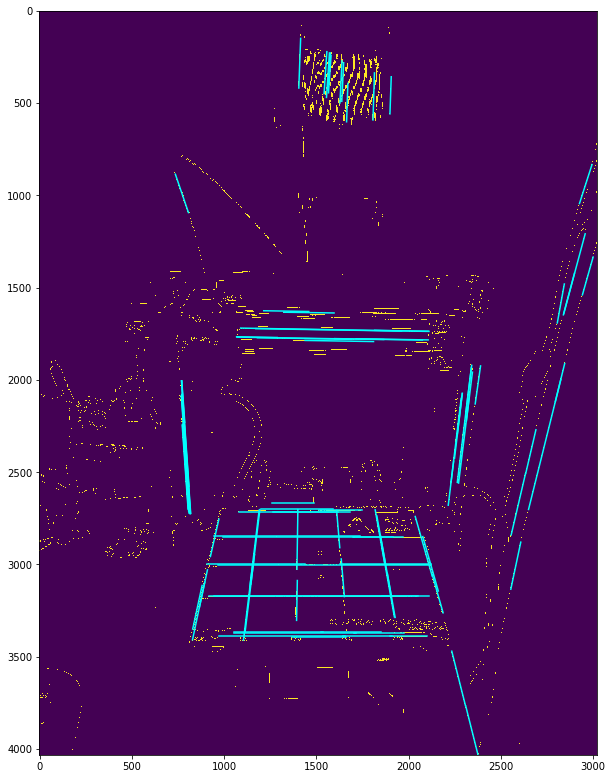

In [20]:
prusa_lines = lines.hough_lines(prusa_edges, 1, np.pi/180, 150, 200, 10)

plt.figure(figsize=(10, 15))
_ = plt.imshow(prusa_edges)

for line in prusa_lines:
    viz.plot_line(line, color='cyan')